# Problem 1: Linear Classifiers (Logistic Regression and GDA)



## (a)
In this exercise, we show that the Hessian $H$ of the loss function for logistic regression is positive semidefinite. From this it follows that the loss function is convex, and, as such, has a global minimum. Running gradient descent has the aim of computing parameters $\theta$ attaining this minimum, because this corresponds to it best explaining the input data. The first partial derivatives are:

\begin{align}
    \frac{\partial J(\theta)}{\partial\theta_i} & = -\frac{1}{m}\frac{\partial}{\partial\theta_i}\Big(\sum_{j=1}^m \big(y^{(j)}\log(g(\theta^T x^{(j)})+(1-y^{(j)})\log(1-g(\theta^T x^{(j)})\big)\Big)\\
    &= -\frac{1}{m}\sum_{j=1}^m\big(y^{(j)}\frac{1}{g(\theta^T x^{(j)}}\cdot g(\theta^T x^{(j)})(1-g(\theta^T x^{(j)})\cdot x^{(j)}_{i} +(1-y^{(j)})\cdot (-g(\theta^T x^{(j)})(1-g(\theta^T x^{(j)})\cdot x^{(j)}_i) \big)\\
    &= -\frac{1}{m}\sum_{j=1}^m \big( y^{(j)}(1-g(\theta^T x^{(j)}))x^{(j)}_i-(1-y^{(j)})g(\theta^T x^{(j)})x^{(j)}_i\big)\\
    &= -\frac{1}{m}\sum_{k=1}^m y^{(k)}x^{(k)}_i-g(\theta^T x^{(k)})x^{(k)}_i,
\end{align}

and so the second partial derivatives are

\begin{align}
    \frac{\partial J(\theta)}{\partial\theta_i\partial\theta_j} = \frac{1}{m}\sum_{k=1}^m g(\theta^Tx^{(k)})(1- g(\theta^Tx^{(k)}))x^{(k)}_i x^{(k)}_j
\end{align}

For any matrix $A$ and vector $x$, one has that $x^T A x = \sum_{1\leq i,j\leq m}a_{ij}x_i x_j$. Thus, for any vector $z$, we compute

\begin{align}
    z^T H z & = \sum_{1\leq i,j\leq m}H_{ij}z_i z_j\\
    &= \sum_{i,j}\Big(\frac{1}{m}\sum_{k=1}^m g(\theta^Tx^{(k)})(1- g(\theta^Tx^{(k)}))x^{(k)}_i x^{(k)}_j\Big)z_i z_j\\
    &= \frac{1}{m}\sum_{k=1}^m g(\theta^T x^{(k)})(1-g(\theta^T x^{(k)}))\sum_{i,j}(x^{(k)}_i z_i)(x^{(k)}_j z_j)\\
    &= \frac{1}{m}\sum_{k=1}^m g(\theta^T x^{(k)})(1-g(\theta^T x^{(k)}))(z^T x^{(k)})^2\\
    &\geq 0,
\end{align}

from which we conclude that $H$ is positive semidefinite.




## (b)
In this exercise, we train a logistic regression classifier using Newton's method.

In [1]:
#Import the required modules
import numpy as np
import sys
sys.path.insert(0,"/home/kasperh/Documents/MachineLearning/PS1/src")
import util
from linear_model import LinearModel

In [2]:
#Train path and validation path
train_path1 = "data/ds1_train.csv"
valid_path1 = "data/ds1_valid.csv"
train_path2 = "data/ds2_train.csv"
valid_path2 = "data/ds2_valid.csv"

The value of theta:  [-6.26018478  2.47707245 -0.0299125 ]
Plot of training data and decision boundary:
Accuracy on training data:  0.8825
Accuracy on evaluation data:  0.9


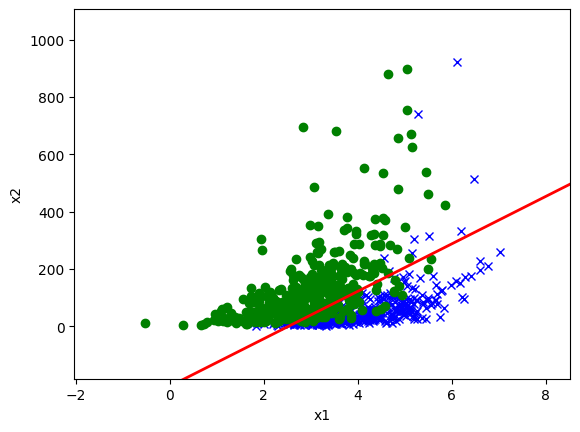

In [3]:
def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    x_eval, y_eval = util.load_dataset(eval_path,add_intercept=True)

    # *** START CODE HERE ***
    
    #Fit model and plot decision boundary
    model = LogisticRegression()
    model.fit(x_train,y_train)
    print("The value of theta: ",model.theta)
    print("Plot of training data and decision boundary:")
    util.plot(x_train,y_train,model.theta,save_path = "plots/PS1-1-b")
    
    #accuracy training,evaluation
    print("Accuracy on training data: ",np.mean(y_train == model.predict(x_train)))
    print("Accuracy on evaluation data: ",np.mean(y_eval == model.predict(x_eval)))
    
    
    # *** END CODE HERE ***


class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m,n = len(x),len(x[0])
        self.theta = np.zeros(n)
        while(True):
            X_theta = x @ self.theta
            sigmoid_X_theta = 1/(1+np.exp(-X_theta))
            
            #First derivative
            derivative_loss = -1/m * x.T @ (y-sigmoid_X_theta)
            
            #Hessian
            H = 1/m * x.T @ np.diag(sigmoid_X_theta) @ (np.identity(m)-np.diag(sigmoid_X_theta)) @ x
            
            #Invert Hessian
            H_inv = np.linalg.inv(H)
            
            #Compute new theta
            theta_new = self.theta - (H_inv @ derivative_loss)
            
            #Check if ||theta_old-theta_new||<=eps, and if so break
            if(np.linalg.norm(self.theta-theta_new) <= 1/10**5):
                break
            else:
                self.theta = theta_new
        
        #return self.theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        pred = 1/(1+np.exp(-x @ self.theta))
        return pred >= 1/2
        # *** END CODE HERE ***

main(train_path1,valid_path1,"plots/prob1b.txt")

In [4]:
#We make a Logistic regression model
x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=True)
x_eval, y_eval = util.load_dataset("data/ds1_valid.csv",add_intercept=True)
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)
theta_logistic = modelLogistic.theta

## (c)

In this exercise, we consider Gaussian discriminant analysis (GDA). We have to write the conditional probability $p(y\mid x ; \phi,\mu_0,\mu_1,\Sigma)$ if a convenient way. We compute
\begin{align}
p(y\mid x ; \phi,\mu_0,\mu_1,\Sigma) &= \frac{p(x\mid y;\phi,\mu_0,\mu_1,\Sigma)p(y;\phi,\mu_0,\mu_1,\Sigma)}{p(x;\phi,\mu_0,\mu_1,\Sigma)}\\
&= \frac{\phi\cdot ((2\pi)^{n/2}|\Sigma|^{1/2})^{-1}\cdot \exp^{-1/2\cdot(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)}}{(1-\phi)\cdot ((2\pi)^{n/2}|\Sigma|^{1/2})^{-1}\cdot \exp^{-1/2\cdot(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)}+\phi\cdot ((2\pi)^{n/2}|\Sigma|^{1/2})^{-1}\cdot \exp^{-1/2\cdot(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)} }\\
&= \frac{1}{1+\frac{1-\phi}{\phi}\cdot\exp^{-1/2\cdot (x-\mu_1)^T\Sigma^{-1}(x-\mu_1)-1/2\cdot (x-\mu_0)^T\Sigma^{-1}(x-\mu_0)}}
\end{align}
Writing this out, we find that 
\begin{align}
p(y\mid x ; \phi,\mu_0,\mu_1,\Sigma) = \frac{1}{1+\exp^{-(\theta^T x+\theta_0)}}
\end{align}
where 
\begin{align}
&\theta = \Sigma^{-1}(\mu_1-\mu_0)\\
&\theta_0 = 1/2\cdot \mu_0^T\Sigma^{-1}\mu_0-1/2\cdot \mu_1^T\Sigma^{-1}\mu_1-\log(\frac{1-\phi}{\phi})
\end{align}

## (d)
In this exercise, we prove that the maximum likelihood estimates of the parameters are as given in the exercises (and the ones that make sense). An easy computation shows that
\begin{align}
    \ell(x,y,\phi,\mu_0,\mu_1,\Sigma) = & m\cdot\log((2\pi)^{n/2}|\Sigma|^{1/2})\\
    - & 1/2\cdot \sum_{i\colon y^{(i)} = 0}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)\\
    + & |\{i\colon y^{(i)}=0\}|\cdot \log(1-\phi)\\
    - & 1/2\cdot \sum_{i\colon y^{(i)} = 1}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)\\
    + & |\{i\colon y^{(i)}=0\}|\cdot \log(\phi)\\
\end{align}
Taking the derivative with respect to $\phi$ and setting equal to $0$, we find that
\begin{align}
& 0 = |\{i\colon y^{(i)}=0\}|\cdot\frac{1}{1-\phi}\cdot (-1)+|\{i\colon y^{(i)}=1\}|\cdot\frac{1}{\phi}\\
\Rightarrow & 0 = |\{i\colon y^{(i)}=0\}|\cdot\phi\cdot (-1)+|\{i\colon y^{(i)}=1\}|\cdot (1-\phi)\\
\Rightarrow & |\{i\colon y^{(i)}=1\}| = \phi\cdot (|\{i\colon y^{(i)}=0\}|+|\{i\colon y^{(i)}=1\}|)=\phi m\\
\Rightarrow & \phi = |\{i\colon y^{(i)}=1\}|/m=\frac{\sum_{i=1}^{m}1\{y^{(i)}=1\}}{m}
\end{align}
This is as it should be, because $\phi$ models the probability that a label is 1, and the best estimate of this for the given training data is clearly given by the expression above.

The following equality is easy to verify: $\partial(x^T A x)/\partial x = 2Ax$. Thus
\begin{align}
& 0 = \frac{\partial\ell}{\partial\mu_0} = -\sum_{i\colon y_{i}=0} (1/2)\cdot 2\Sigma^{-1}(x^{(i)}-\mu_0)\\
\Rightarrow & 0 = \sum_{i\colon y^{(i)}=0}x^{(i)}-\mu_0\\
\Rightarrow & \sum_{i\colon y^{(i)}=0}x^{(i)} = \mu_0\cdot |\{i\colon y^{(i)}=0\}|\\
\Rightarrow & \mu_0 = \frac{\sum_{i\colon y^{(i)}=0}x^{(i)}}{|\{i\colon y^{(i)}=0\}|}
\end{align}
as should be the case. The argument for $\mu_1$ is identical.

Lastly, we give the proof of $\Sigma$ in the case of $n=1$. Now a simple computation shows:
\begin{align}
& 0 = \frac{\partial\ell}{\partial\Sigma} = -\frac{m}{2}|\Sigma|^{-1}+\sum_{i\colon y^{(i)}=0}1/2\cdot (x^{(i)}-\mu_0)^T\Sigma^{-2}(x^{(i)}-\mu_0)+\sum_{i\colon y^{(i)}=1}1/2\cdot (x^{(i)}-\mu_1)^T\Sigma^{-2}(x^{(i)}-\mu_1)\\
\Rightarrow & \frac{m}{2}|\Sigma| = \sum_{i\colon y^{(i)}=0}1/2\cdot (x^{(i)}-\mu_0)^T(x^{(i)}-\mu_0)+\sum_{i\colon y^{(i)}=1}1/2\cdot (x^{(i)}-\mu_1)^T(x^{(i)}-\mu_1)\\
\Rightarrow & \Sigma = \frac{1}{m}\sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}})(x^{(i)}-\mu_{y^{(i)}})^T
\end{align}
as claimed.

## (e)
We use the formulas from above to compute the MLE parameters for a GDA. From these we compute theta.

In [5]:
import numpy as np
import util
from linear_model import LinearModel


def main(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)

    # *** START CODE HERE ***
    modelGDA = GDA()
    modelGDA.fit(x_train,y_train)
    pred = modelGDA.predict(x_train)
    print("Accuracy on training set: ",np.mean(pred == y_train))
    # *** END CODE HERE ***


class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m,n = len(x),len(x[0])
        y_sum = sum(y)
        
        #phi: probability that label is 1
        phi = y_sum/m
        
        #mu0,mu1: expected feature variable given label 0/1
        mu_0 = (x.T @ (1-y))/(m-y_sum)
        mu_1 = (x.T @ y)/y_sum
        
        #sigma IKKE VEKTORISERET
        sigma = [[0.0,0.0],[0.0,0.0]]
        for i in range(m):
            if(y[i] == 0):
                sigma += np.outer(x[i]-mu_0,x[i]-mu_0)
            else:
                sigma += np.outer(x[i]-mu_1,x[i]-mu_1)
        sigma /= m
        
        #theta
        sigma_inv = np.linalg.inv(sigma)
        theta = np.dot(sigma_inv, mu_1 - mu_0)
        theta_0 = 1 / 2 * mu_0 @ sigma_inv @ mu_0 - 1 / 2 * mu_1 @ sigma_inv @ mu_1 - np.log((1 - phi) / phi)
        self.theta = np.insert(theta, 0, theta_0)
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        pred = 1/(1+np.exp(-(x@self.theta[1:]+self.theta[0])))
        return pred>=1/2
        # *** END CODE HERE

main(train_path1,valid_path1,"plots/prob1e.txt")


Accuracy on training set:  0.86625


We now make predictions on the validation set.



In [6]:
x_train, y_train = util.load_dataset(train_path1, add_intercept=False)
x_eval, y_eval = util.load_dataset(valid_path1, add_intercept=False)
modelGDA = GDA()
modelGDA.fit(x_train,y_train)
theta_GDA = modelGDA.theta
pred = modelGDA.predict(x_eval)
print("Accuracy on validation set: ",np.mean(y_eval == pred))

Accuracy on validation set:  0.83


In [7]:
import matplotlib.pyplot as plt
def plot_two(x, y, theta1,name1,theta2,name2, save_path=None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta1^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta1[0] / theta1[2] * correction + theta1[1] / theta1[2] * x1)
    plt.plot(x1, x2, c='black',label = name1, linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)
    
    # Plot decision boundary (found by solving for theta2^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta2[0] / theta2[2] * correction + theta2[1] / theta2[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2,label = name2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)
    plt.legend()

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)

[-6.26018478  2.47707245 -0.0299125 ] [-6.17158405  2.22055506 -0.01763375]


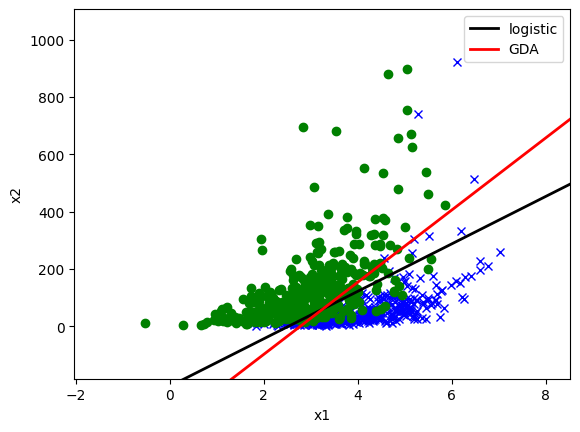

In [8]:
#We plot
print(theta_logistic,theta_GDA)
plot_two(x_train,y_train,theta_logistic,"logistic",theta_GDA,"GDA","plots/PS1-1-f.png")

We note that the logistic regression seems to work better for the first dataset.

# (g) 
We repeat exercise (f) for the second dataset.


Accuracy on training data, logistic:  0.915
Accuracy on training data, GDA:  0.91375


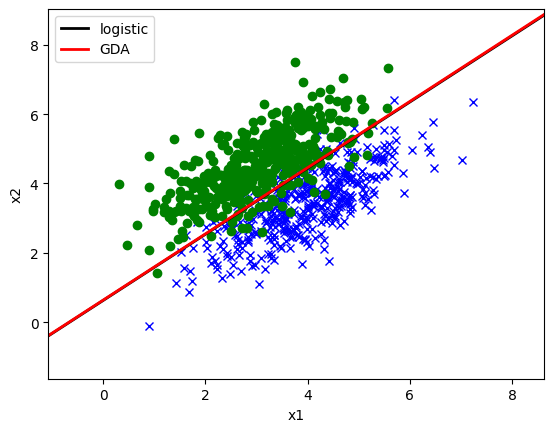

In [11]:
train_path2 = "data/ds2_train.csv"
valid_path2 = "data/ds2_valid.csv"
#Train logistic model
x_train2,y_train2 = util.load_dataset(train_path2,label_col = "y",add_intercept = True)
model_logistic = LogisticRegression()
model_logistic.fit(x_train2,y_train2)
theta_logistic = model_logistic.theta
print("Accuracy on training data, logistic: ",np.mean(y_train1 == model_logistic.predict(x_train2)))
#Train GDA model
x_train2,y_train2 = util.load_dataset(train_path2,label_col = "y",add_intercept = False)
model_GDA = GDA()
model_GDA.fit(x_train2,y_train2)
theta_GDA = model_GDA.theta
print("Accuracy on training data, GDA: ",np.mean(y_train2 == model_GDA.predict(x_train2)))
plot_two(x_train2,y_train2,theta_logistic,"logistic",theta_GDA,"GDA","plots/PS1-1-g.png")

Here we see that the GDA and the logistic model are comparable. The reason that GDA performs better here is that the data looks more normally distributed, which is one of the assumptions in the GDA model.

## (h)
Can we find a transformation of the $x^{(i)}$ in exercise (f) such that the GDA performs better. As of now, the dataset seems to follow the formula $x^{(i)}_2 = (x^{(i)}_1)^2$. Below we make this transformation, train the models on the transformed data and plot the decision boundaries. We see that GDA performs well for the transformed data.

Accuracy on training data, logistic:  0.90625
Accuracy on training data, GDA:  0.90875


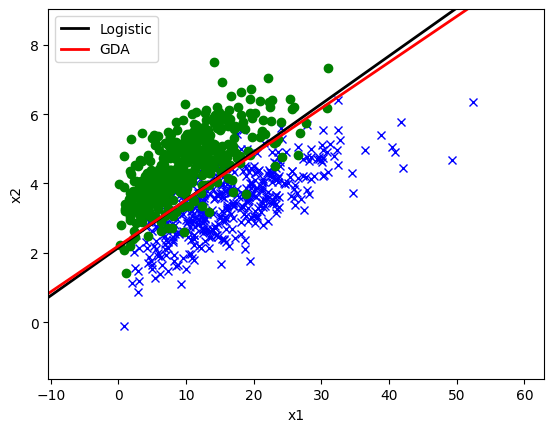

In [12]:
train_path1 = "data/ds1_train.csv"
#Train logistic model
x_train1,y_train1 = util.load_dataset(train_path2,label_col = "y",add_intercept = True)
model_logistic = LogisticRegression()
for i in range(len(x_train1)):
    x_train1[i][1] = x_train1[i][1]**2
model_logistic.fit(x_train1,y_train1)
theta_logistic = model_logistic.theta
print("Accuracy on training data, logistic: ",np.mean(y_train1 == model_logistic.predict(x_train1)))
#Train GDA model
x_train1,y_train1 = util.load_dataset(train_path2,label_col = "y",add_intercept = False)
model_GDA = GDA()
for i in range(len(x_train1)):
    x_train1[i][0] = x_train1[i][0]**2
model_GDA.fit(x_train1,y_train1)
theta_GDA = model_GDA.theta
plot_two(x_train1,y_train1,theta_logistic,"Logistic",theta_GDA,"GDA")
print("Accuracy on training data, GDA: ",np.mean(y_train1 == model_GDA.predict(x_train1)))